Import Libraries

In [1]:
import pandas as pd
import missingno as mn

Load the Dataset

In [2]:
df = pd.read_csv("Kangaroo_main.csv")

Drop irrelevant columns

In [3]:
dropped = df.drop(columns=[
    "url", "hasBalcony", "floorCount", "monthlyCost", "hasGarden",
    "hasTerrace", "accessibleDisabledPeople", "Unnamed: 0",
    "terraceOrientation", "hasDressingRoom", "hasDiningRoom",
    "streetFacadeWidth", "hasHeatPump", "hasPhotovoltaicPanels",
    "hasThermicPanels", "hasLivingRoom", "gardenOrientation",
    "parkingCountOutdoor", "hasArmoredDoor", "hasVisiophone"
])

Fill Missing Values

In [4]:
dropped["gardenSurface"] = dropped["gardenSurface"].fillna(0)
dropped["terraceSurface"] = dropped["terraceSurface"].fillna(0)
dropped["habitableSurface"] = dropped["habitableSurface"].fillna(dropped["habitableSurface"].median())
dropped["bathroomCount"] = dropped["bathroomCount"].fillna(dropped["bathroomCount"].median())
dropped["bedroomCount"] = dropped["bedroomCount"].fillna(dropped["bedroomCount"].median())

Merge postCode with province

In [5]:
dropped["postCode"] = dropped["postCode"].astype(str) + ' - ' + dropped["province"].str.upper()
dropped.drop(columns=["province"], inplace=True)
dropped.rename(columns={"postCode": "postCode-province"}, inplace=True)
dropped["locality"] = dropped["locality"].str.upper()

Merge type and subtype Without Duplicates

In [6]:
dropped["type-subtype"] = (dropped["type"].str.upper() + " " + dropped["subtype"].str.upper())
dropped["type-subtype"] = dropped["type-subtype"].apply(lambda x: " ".join(sorted(set(x.split()))))
dropped.drop(columns=["type", "subtype"], inplace=True)

Move type-subtype to the Second Column

In [7]:
replace_type_subtype = list(dropped.columns)
replace_type_subtype.insert(1, replace_type_subtype.pop(replace_type_subtype.index('type-subtype')))
dropped = dropped[replace_type_subtype]

Visualize with missingno

<Axes: >

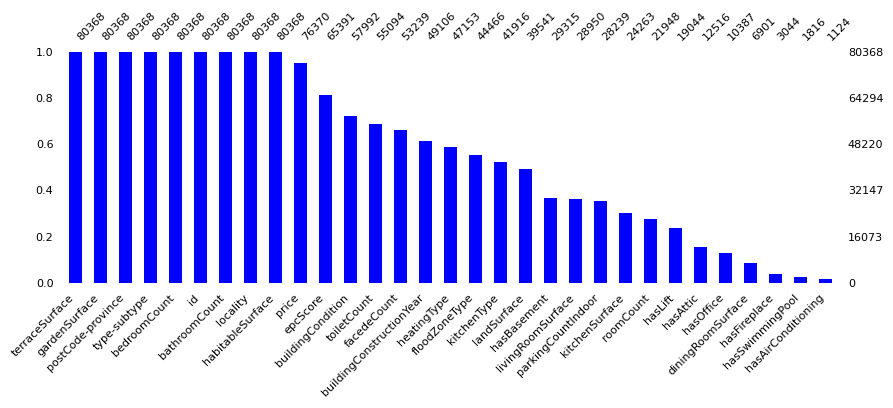

In [8]:
mn.bar(dropped, figsize=(10, 3), color="blue", fontsize=8, sort="descending")

Classify kitchenType into a Numerical Scale

In [9]:
dropped["kitchenType"] = dropped["kitchenType"].replace({
    "NOT_INSTALLED": 1,
    "INSTALLED": 2,
    "SEMI_EQUIPPED": 3,
    "HYPER_EQUIPPED": 4,
    "USA_UNINSTALLED": 5,
    "USA_INSTALLED": 6,
    "USA_SEMI_EQUIPPED": 7,
    "USA_HYPER_EQUIPPED": 8
}).fillna(0)

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_10412\3330464396.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dropped["kitchenType"] = dropped["kitchenType"].replace({


Classify floodZoneType into a Numerical Scale

In [10]:
dropped["floodZoneType"] = dropped["floodZoneType"].replace({
    "NON_FLOOD_ZONE": 1,
    "POSSIBLE_N_CIRCUMSCRIBED_WATERSIDE_ZONE": 2,
    "CIRCUMSCRIBED_WATERSIDE_ZONE": 3,
    "POSSIBLE_N_CIRCUMSCRIBED_FLOOD_ZONE": 4,
    "POSSIBLE_FLOOD_ZONE": 5,
    "CIRCUMSCRIBED_FLOOD_ZONE": 6,
    "RECOGNIZED_FLOOD_ZONE": 7,
    "RECOGNIZED_N_CIRCUMSCRIBED_WATERSIDE_FLOOD_ZONE": 8,
    "RECOGNIZED_N_CIRCUMSCRIBED_FLOOD_ZONE": 9
}).fillna(0)

C:\Users\Administrateur\AppData\Local\Temp\ipykernel_10412\2381907161.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dropped["floodZoneType"] = dropped["floodZoneType"].replace({


Classify floodZoneType in a  numerical scale (Another way)

In [11]:
# dropped.loc[dropped['floodZoneType']=="NON_FLOOD_ZONE",'floodZoneType_classification'] = 1
# dropped.loc[dropped['floodZoneType']=="POSSIBLE_N_CIRCUMSCRIBED_WATERSIDE_ZONE", 'floodZoneType_classification'] = 2
# dropped.loc[dropped['floodZoneType']=="CIRCUMSCRIBED_WATERSIDE_ZONE", 'floodZoneType_classification'] = 3
# dropped.loc[dropped['floodZoneType']=="POSSIBLE_N_CIRCUMSCRIBED_FLOOD_ZONE", 'floodZoneType_classification'] = 4
# dropped.loc[dropped['floodZoneType']=="POSSIBLE_FLOOD_ZONE", 'floodZoneType_classification'] = 5
# dropped.loc[dropped['floodZoneType']=="CIRCUMSCRIBED_FLOOD_ZONE", 'floodZoneType_classification'] = 6
# dropped.loc[dropped['floodZoneType']=="RECOGNIZED_FLOOD_ZONE", 'floodZoneType_classification'] = 7
# dropped.loc[dropped['floodZoneType']=="RECOGNIZED_N_CIRCUMSCRIBED_WATERSIDE_FLOOD_ZONE", 'floodZoneType_classification'] = 8
# dropped.loc[dropped['floodZoneType']=="RECOGNIZED_N_CIRCUMSCRIBED_FLOOD_ZONE", 'floodZoneType_classification'] = 9

# dropped["floodZoneType"] = dropped["floodZoneType"].fillna(0)
# dropped["floodZoneType_classification"] = dropped["floodZoneType_classification"].fillna(0)

Classify epcScore into a Numerical Scale

In [12]:
dropped["epcScore"] = dropped["epcScore"].replace({
    "A++": 1,
    "A+": 2,
    "A": 3,
    "B": 4,
    "C": 5,
    "D": 6,
    "E": 7,
    "F": 8,
    "G": 9
}).fillna(0)

Drop Rows with Invalid epcScore Values

In [13]:
drop_epcScore_rows_with_two_letters = ['G_C', 'F_D', 'C_A', 'F_C', 'E_C', 'C_B', 'E_D', 'G_F', 'D_C', 'G_E', 'X']
dropped = dropped[~dropped['epcScore'].isin(drop_epcScore_rows_with_two_letters)]

Drop Rows Where price is NaN

In [14]:
dropped.dropna(subset=["price"], inplace=True)

Check the Shape of the Dataset

In [15]:
dropped.shape

(76349, 31)